In [1]:
import torch


# PyTorch workflow

lest's explore an example PyTorch end-to-end workflow



In [2]:
from torch import nn # nn contains all of PyTroch's building blocks for nueral networks
import matplotlib.pyplot as plt 

# Check for version
torch.__version__

'2.1.2'

## Data (preparing and learning)

Data can be almost anything.... in machine learning

* Excel 
* Vedio
* DNA
* etc...

Machine learning is a game of two parts:
1. Get data inro a numerical form 
2. build a model 

In [3]:
# Create *known* paramaters

weight = 0.7
bias = 0.3

# Create 
start = 0 
end = 1
step = 0.02
X = torch.arange(start,end,step=step).unsqueeze(dim=1)
y = weight * X + bias

### spliting data into training and test sets 

let's create a train and test sets for our data

In [4]:
# Create a train_test_split

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split] , y[:train_split]
X_test, y_test = X[train_split:] , y[train_split:]

## How  might we better visualize our data?

"Visualize, visualize, visualize"



In [5]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    
    plt.figure(figsize=((10,7)))

    # Plot the training data in blue
    plt.scatter(train_data,train_labels,c="b" , s=  4, label = "Training data")

    # Plot the test data in green 
    plt.scatter(test_data,test_labels,c="g",s=4, label = "Testing data")

    # Are there predictions :
    if predictions is not None:
        # plot the predictions if they exist
        plt.scatter(test_data, predictions, c = "r", s=4, label = "Predictions")

    # Show the legend
    plt.legend(prop = {"size" : 14})
    plt.show()

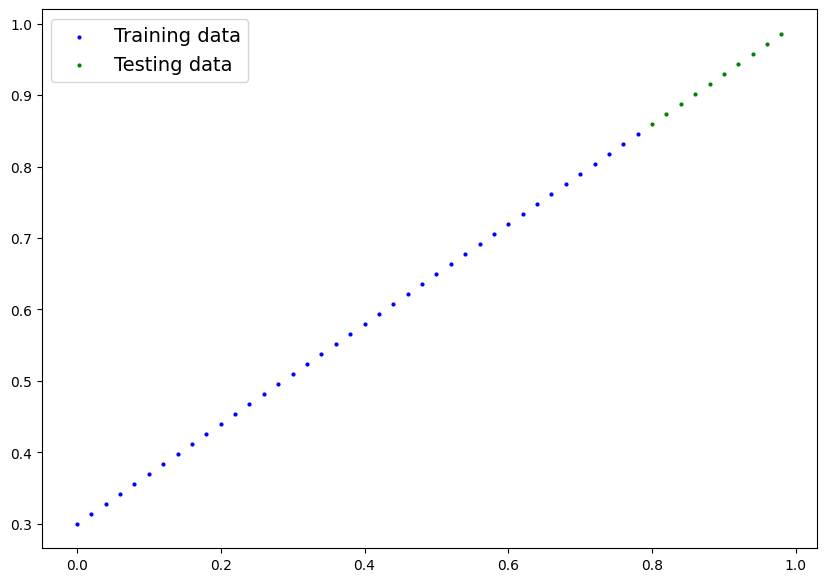

In [6]:
plot_predictions()

## Build Model

In [7]:
# Create linear regression model class

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad= True,
                                                dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                                requires_grad= True,
                                                dtype = torch.float))
    # Forward method to define the computation in the model
    def forward(self,X : torch.Tensor) -> torch.Tensor:
        return self.weights * X + self.bias

        


### PyTorch model building essentials

* torch.nn includes all of the buildings for computational graphs
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules 
* torch.optim - this is where the optimizers live in pytorch
* def forward() - All nn.Module subclasses require you to overwrite forward() method 

### Checking the contents of our PyTorch mdoel

we cancheck ou model parameters or what is inside our model using .parameters()

In [40]:
# Create a rondom seed

torch.manual_seed(42)

model_0 = LinearRegressionModel()

# Check out the parameters 
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mdoe()`

To check our model's prdictive power, lets see how yell it predicts `y_test` based on `x_test`
when we pass dara through our model, it's going to run it through forward() method

In [19]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [11]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

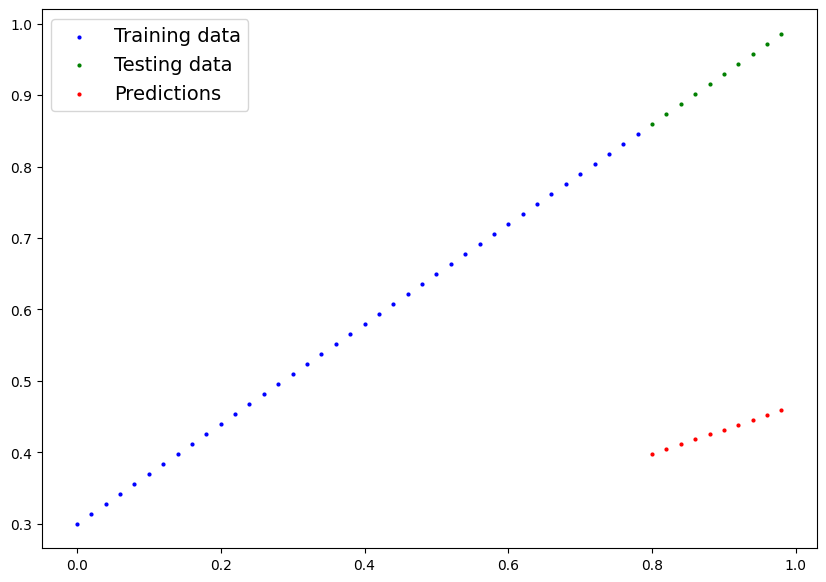

In [12]:
plot_predictions(predictions=y_preds)

## 3. Train the model 

the whole ideo of training of a model is to move from some unknown parameters to the desired parameters

one way to measure how poor or how wrong the model predictions are is to use a loss function/cost function/criterion 

In [41]:
# set up a loss function

loss_fn = nn.L1Loss()

# setup an optimizer ( stoichastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.02,)

### Building a training loop in PyTorch

A couple of things we need in a training loop:

0. loop throught the data
1. forward pass/ forward propagation( this invlolves data moving through our model functions) to make prdictions
2. Calculate the loss
3. Optimizer zero grad
4. loss backword - move backward through the nerwork to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**) 
5. Optimizer step - uses the optimizer to adjust our model's parameters to try and improve th loss( gradient descent)

In [42]:
# An epoch is one loop throught the data ... (this is a hyperparameter becuase we've set it manually)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []


# 0. Loop through the data
for epoch in range(epochs):
    epoch_count.append(epoch)
    # set the model to trainning mode ( sets all parameters that require gradient to require gradients)
    model_0.train()
    # 1. Forward pass
    y_preds = model_0(X_train)

    # 2. calculate the loss
    loss = loss_fn(y_preds,y_train)
    loss_values.append(loss)
    print(f"loss: {loss}")

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on ths loss with respect to the parameters of the model
    loss.backward()

    # 5. step the optimizer 
    optimizer.step()

    ### Testing
    model_0.eval() # turns off different settings in the  model not needed for wvaluation/testing (dropout/ batchnorm)
    with torch.inference_mode(): # this turns off gradient tracking and other things 
        # 1.  Do the forward pass
        test_pred = model_0(X_test)
        # 2. Calculate ther loss
        test_loss = loss_fn(test_pred,y_test)
        test_loss_values.append(test_loss)
        if epoch % 10 ==0 :
            print(f"Epoch: {epoch} | Loss: {test_loss}" )
            #print the state of the model 
            print(model_0.state_dict())
     



loss: 0.31288138031959534
Epoch: 0 | Loss: 0.4675941467285156
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
loss: 0.28983935713768005
loss: 0.26679736375808716
loss: 0.24375534057617188
loss: 0.22071333229541779
loss: 0.1976713389158249
loss: 0.1746293604373932
loss: 0.1515873372554779
loss: 0.12854532897472382
loss: 0.10609114170074463
loss: 0.08831816911697388
Epoch: 10 | Loss: 0.20536987483501434
OrderedDict([('weights', tensor([0.4223])), ('bias', tensor([0.3418]))])
loss: 0.07545244693756104
loss: 0.06641419231891632
loss: 0.05990664288401604
loss: 0.055704690515995026
loss: 0.05250788480043411
loss: 0.050354838371276855
loss: 0.048709869384765625
loss: 0.047426268458366394
loss: 0.04641704633831978
loss: 0.04547790437936783
Epoch: 20 | Loss: 0.11100725829601288
OrderedDict([('weights', tensor([0.4766])), ('bias', tensor([0.3878]))])
loss: 0.044677894562482834
loss: 0.043880581855773926
loss: 0.043182581663131714
loss: 0.042484574019908905
loss: 0.041786

In [37]:
# turn values to numpy

import numpy as np

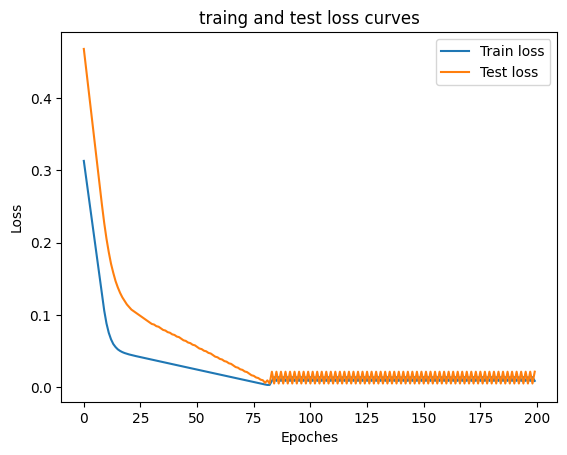

In [43]:
# plot the loss values

plt.plot(epoch_count,torch.tensor(loss_values).numpy(),label= "Train loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy() , label = "Test loss")
plt.title("traing and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoches")
plt.legend()
plt.show()

In [44]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    

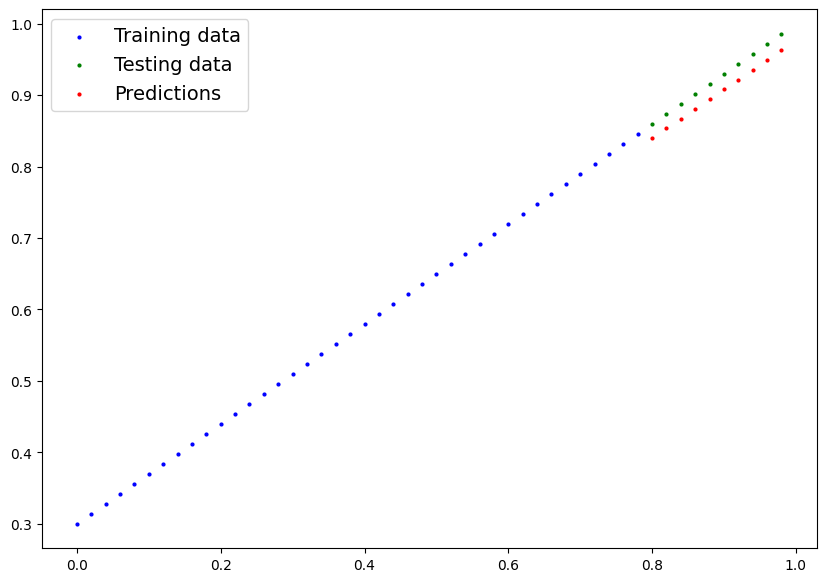

In [46]:
plot_predictions(predictions=y_preds)

## saving a model in Pytorch

There are three main methods you should know about :
1. `torch.save()`- allows you save a Pytorch object in pickle format
2. `torch.load()` -allows you to load a saved PyTorch objject
3. `torch.nn.Module.load_state_dict()` - allows to load a models saved dictionary

In [49]:
# Savinf our PyTorch model 
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model dave path
MODEL_NAME = "01_pytorch_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_model_0.pth


### loading Pytorch model

In [50]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [51]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [52]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6849])), ('bias', tensor([0.2918]))])